# ALP Data Mining - Pak Edwin

use the dataset __"Dataset"__ for this exercise

Task:
1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.naive_bayes import GaussianNB

## Load Data 

In [3]:
df = pd.read_csv("C:/Users/Asuspc/OneDrive/Documents/Data Mining 2023_2024/Pak Edwin/ALP_Student_Prediction/data.csv", sep=';')

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### **1. Data Preparation and Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
# a. Missing values
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Tidak ada missing value, maka lanjut ke step berikutnya

In [6]:
# b. Check of duplicate data

duplicatecheck = df.duplicated().sum()
print("The total of the duplicate data is", duplicatecheck)

duplicatedata = df[df.duplicated()]
print("\nThe duplicate data is:")
duplicatedata

The total of the duplicate data is 0

The duplicate data is:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


In [7]:
# c. Categorical variables

# Categorical feature that needs to be encoded into numerical format

type = (df.dtypes == 'object')
object_value = list(type[type].index)
print(f'Categorical feature in the Dataset:-{object_value}')

Categorical feature in the Dataset:-['Target']


In [8]:
# I choose column Target that need to be encoded

label_encoder = LabelEncoder()

# Encoding label for Column Target
df['Target'] = label_encoder.fit_transform(df['Target'])

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [9]:
# d. Drop columns that aren't really important
columns_to_drop = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date']
df = df.drop(columns=columns_to_drop, axis=1)

df.head()

,Marital status,Previous qualification,Nacionality,Admission grade,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,127.3,1,0,20,0,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,1,1,142.5,1,0,19,0,0,6,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,1,124.8,1,0,19,0,0,6,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,1,1,119.6,0,0,20,0,0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,1,1,141.5,0,0,45,0,0,6,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [10]:
# e. Change name of the column

df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

df.head()

,Marital status,Previous qualification,Nationality,Admission grade,Gender,Scholarship holder,Age,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,127.3,1,0,20,0,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,1,1,142.5,1,0,19,0,0,6,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,1,124.8,1,0,19,0,0,6,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,1,1,119.6,0,0,20,0,0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,1,1,141.5,0,0,45,0,0,6,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


### **2. Visualization (EDA)**

In [11]:
df.describe()

,Marital status,Previous qualification,Nationality,Admission grade,Gender,Scholarship holder,Age,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,4.577758,1.873192,126.978119,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,10.216592,6.914514,14.482001,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,1.000000,95.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,117.900000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,1.000000,1.000000,126.100000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,1.000000,1.000000,134.800000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,43.000000,109.000000,190.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


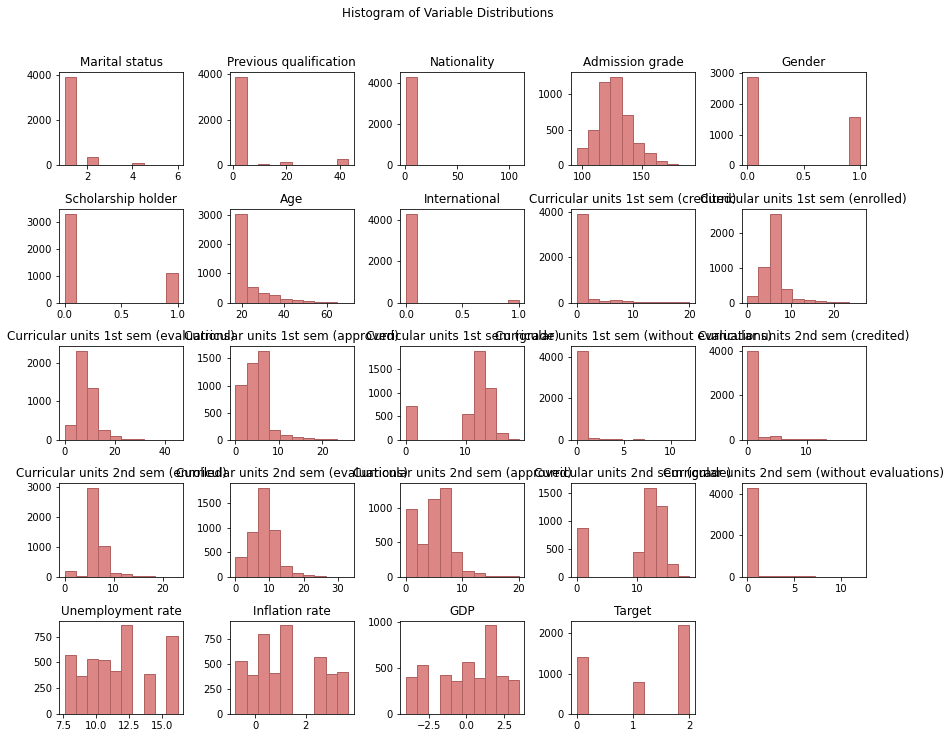

In [12]:
# Plot histogram of distribution plot for all the variables
df.hist(figsize=(12, 10), bins=10, grid=False, color='#DC8686', edgecolor='#B06161')

# Set the plot title and the axis labels
plt.suptitle('Histogram of Variable Distributions', y=1.02)
plt.tight_layout()

plt.show()

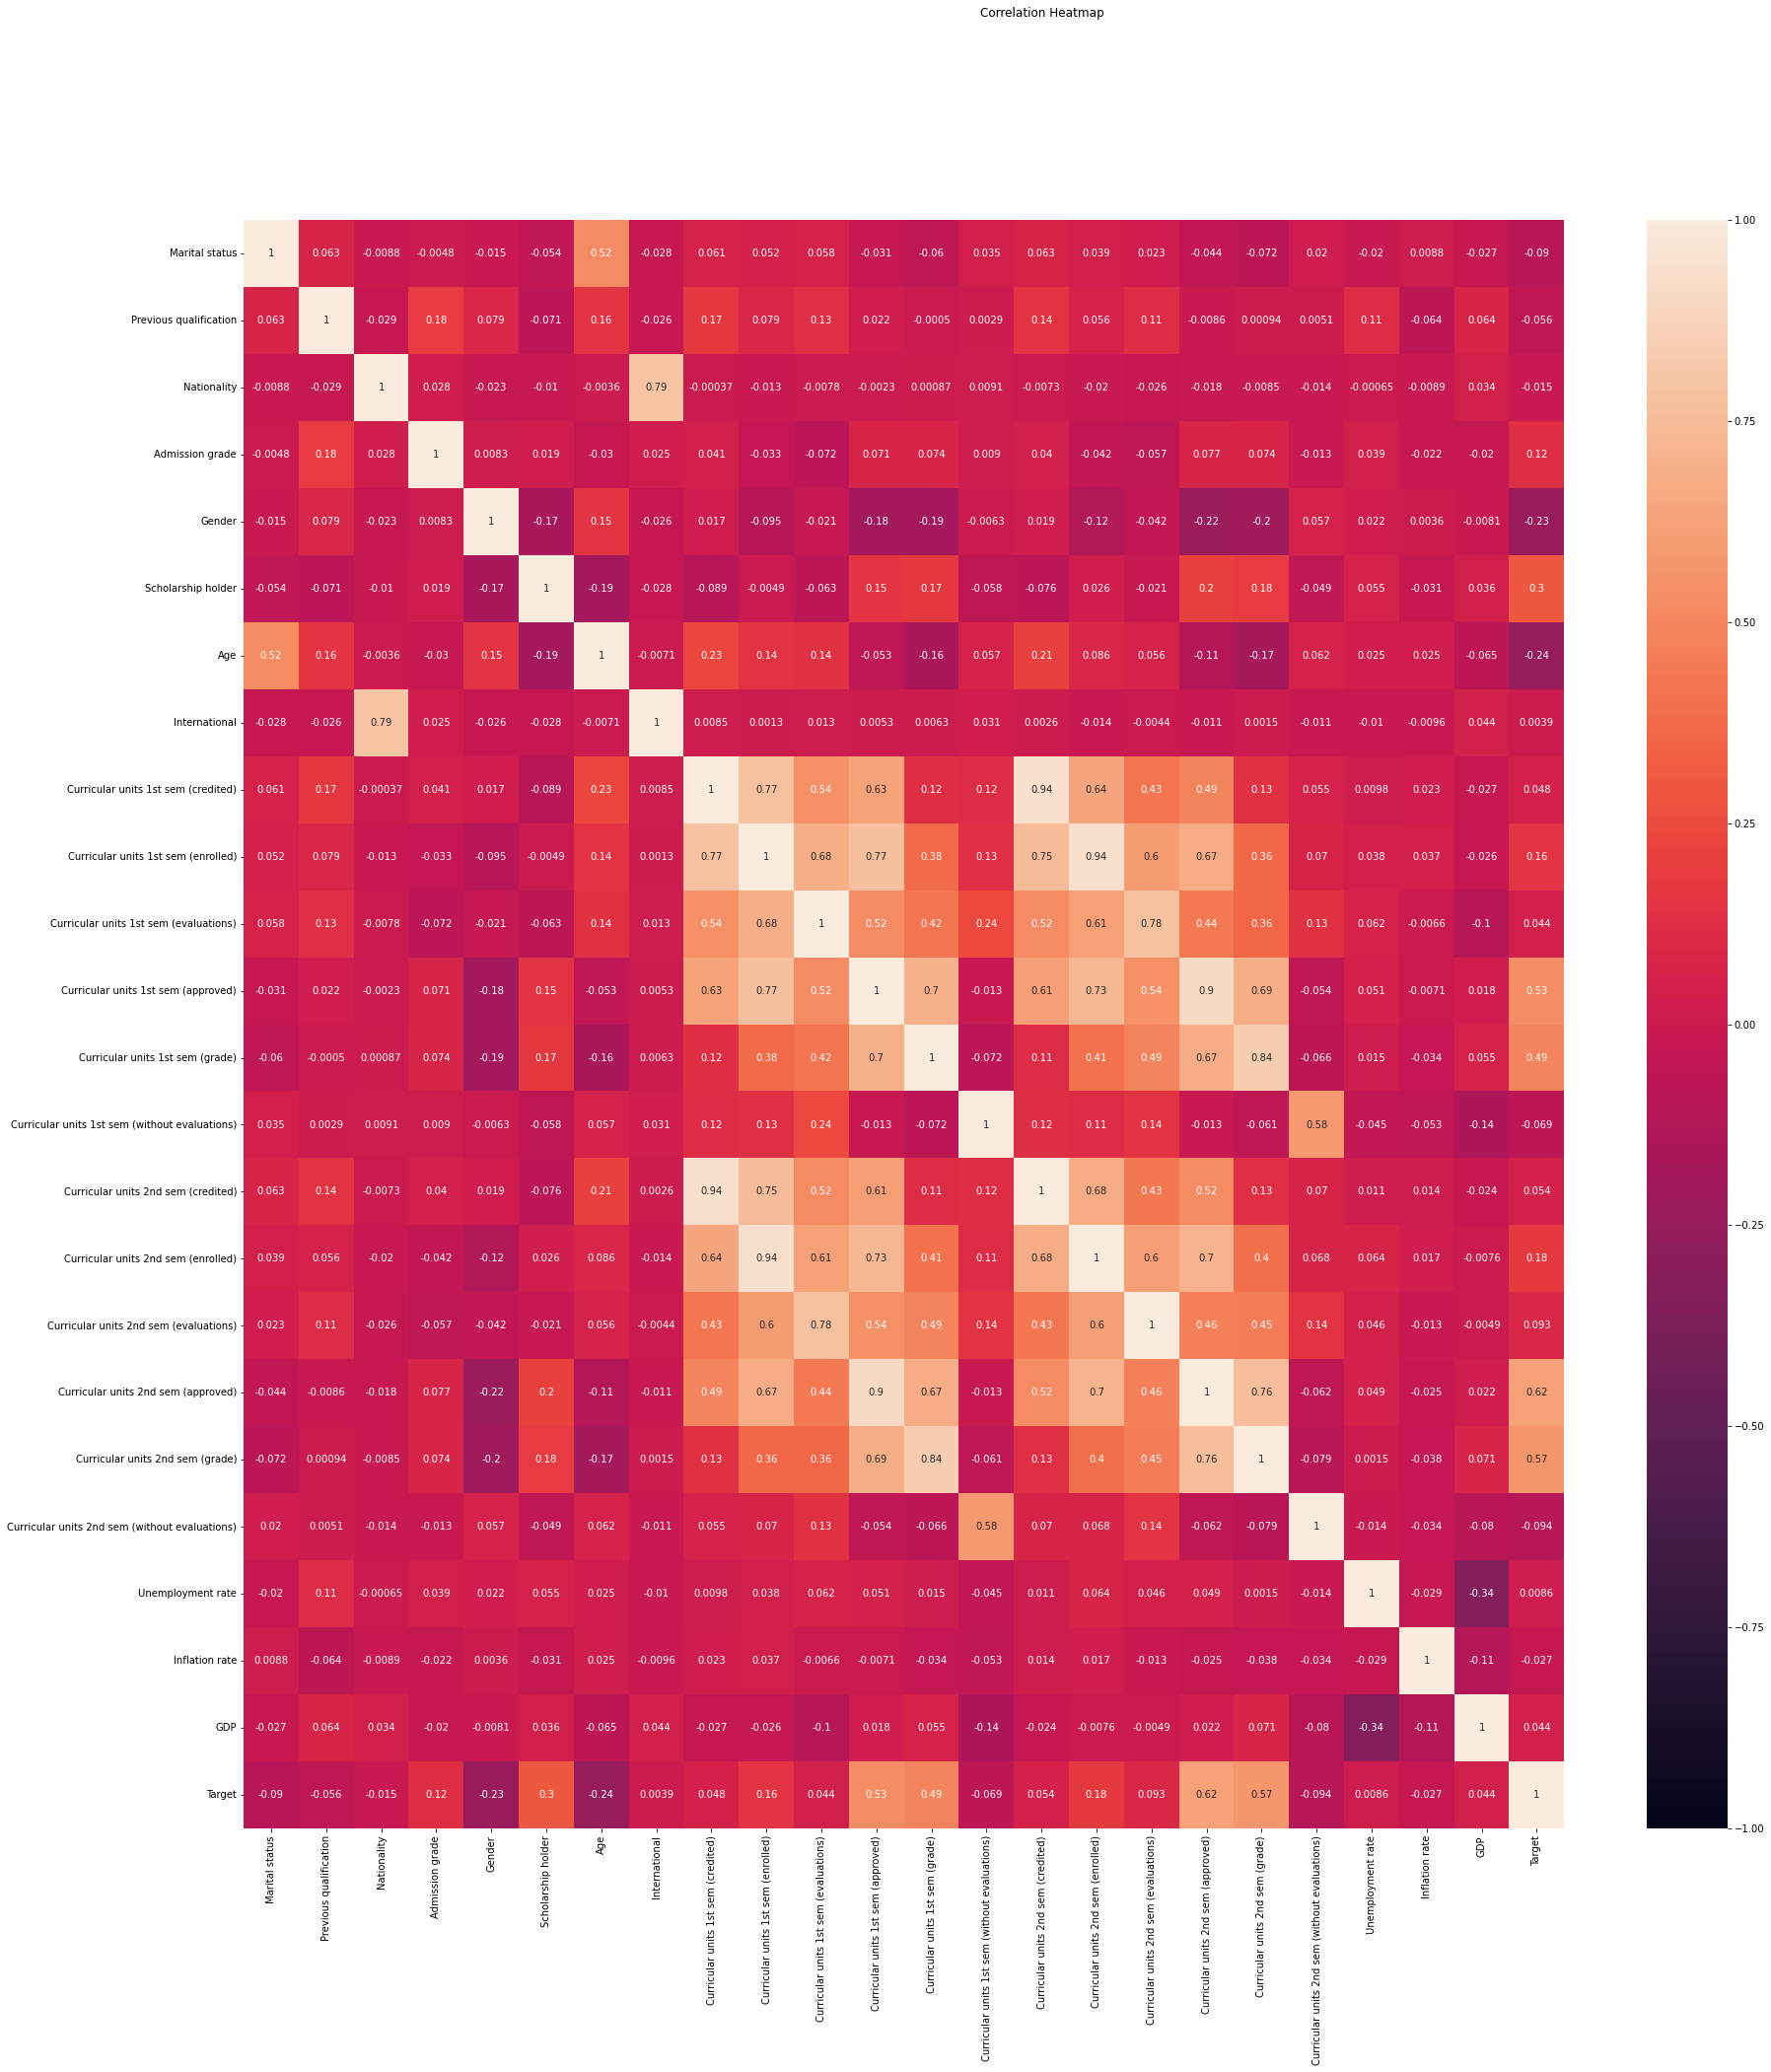

In [13]:
# Correlation Heatmap 
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.suptitle('Correlation Heatmap')

plt.show()

### **3. Clustering**

##### K-Means Clustering

In [14]:
scaler = StandardScaler()
kmeansclus_df = scaler.fit_transform(df)

In [15]:
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42}

# check the inertia for each K
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(kmeansclus_df)
    WCSS.append(kmeans.inertia_)

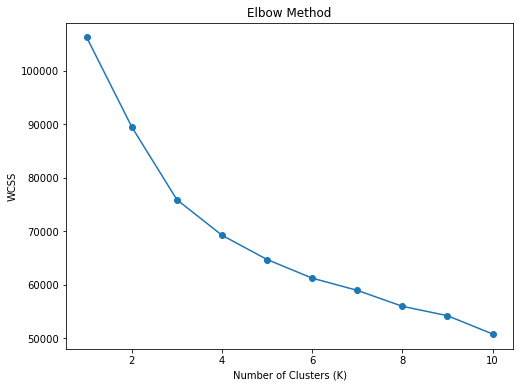

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [17]:
from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), WCSS, curve="convex", direction="decreasing")
print('The best k for your model is ', findknee.elbow)

The best k for your model is  4


In [18]:
kmeans = KMeans(n_init=3 , n_clusters=4, max_iter=300, random_state=42)

ykmeans= kmeans.fit_predict(kmeansclus_df)
df['K-Means']= ykmeans

##### Model Algorithm - Hierarchical Clustering

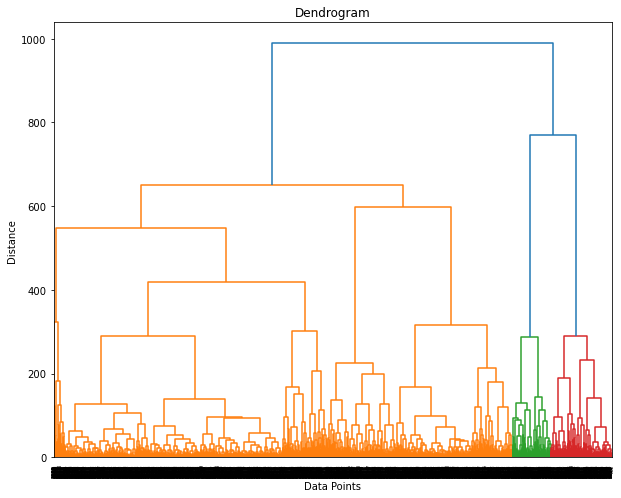

In [19]:
new_data = df.drop('K-Means', axis=1) 

distance_matrix = linkage(new_data, method='ward', metric='euclidean')

plt.figure(figsize=(10, 8))
dendrogram(distance_matrix, orientation='top', p=30, truncate_mode='level', show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### **4. Prediciton Model**

##### a. Logistic Regression

In [24]:
X = df.drop(columns=["Target"], axis=1)  # Variabel independen (semua kolom kecuali Target)
y = df["Target"]  # Variabel dependen (Target)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3981, 24) (3981,)
Test set: (443, 24) (443,)


In [26]:
# Do scalling feature on Variable X_train and X_test 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, y_train)

accuracy = model.score(X_test_scaled, y_test)
print("Logistic Regression model accuracy:", accuracy)

Logistic Regression model accuracy: 0.7990970654627539


In [28]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [29]:
# test the model with the test dataset
y_pred_test = model.predict(X_test_scaled)
print(y_pred_test)

[2 0 2 2 1 0 2 2 0 2 0 0 1 2 0 2 1 0 2 1 0 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2
 2 0 0 2 0 2 2 2 1 1 2 2 2 0 0 1 0 2 0 2 2 0 2 2 1 2 1 0 2 0 2 2 0 0 2 0 0
 0 2 1 0 2 2 2 1 2 2 0 2 0 0 0 2 2 2 0 1 0 0 2 2 2 0 2 2 2 2 2 0 1 0 1 0 2
 1 0 2 2 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 2 2 0 2 2 2 0 2 0 0 2 1 0 0 2 2 2 0
 0 2 0 0 0 0 2 0 0 1 2 0 2 0 0 0 0 2 2 0 1 0 1 0 2 2 0 2 0 1 1 2 1 0 0 2 2
 2 1 0 0 2 1 1 2 2 1 2 1 2 0 2 1 0 2 2 0 2 2 2 0 0 2 2 0 2 1 1 2 2 1 2 2 2
 2 2 0 2 1 2 2 1 2 2 1 0 2 2 2 1 2 2 2 2 1 1 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 0 2 2 1 0 2 0 2 2 2 2 0 2 2 2 1 1 0 1 2 0 2
 0 0 2 0 0 2 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 0 2 2 0 0 0 2 2 1 0 2 2 0 0 2 0
 2 0 0 0 2 2 0 1 2 2 0 2 0 2 2 0 2 1 2 2 0 2 1 2 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 0 0 0 1 2 2 2 2 1 2 2 1 2 0 2 0 0 2 2 2 0 2 2 2 0 0 0 2 2 1 2 2 0 2 2 2
 2 2 2 2 0 0 2 1 0 2 2 2 0 2 0 2 2 0 0 0 2 2 2 0 2 0 0 2 0 2 2 0 1 2 2 2]


In [30]:
confusionmatrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Confusion Matrix")
print(confusionmatrix)

print(f"Accuracy Score: {accuracy:.4f}")

Confusion Matrix
[[120  12  13]
 [ 20  31  26]
 [  9   9 203]]
Accuracy Score: 0.7991


##### b. K-NN

In [31]:
knn_classifier =  KNeighborsClassifier(metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
y_pred_test2 = knn_classifier.predict(X_test_scaled)
print(y_pred_test2)

[2 0 2 2 1 1 2 2 0 2 1 0 1 0 0 2 1 0 2 0 0 2 2 1 2 1 2 0 2 2 0 0 2 2 0 2 2
 2 1 0 2 0 2 2 2 0 0 2 2 2 0 0 1 0 2 0 2 2 0 1 2 0 1 1 0 2 1 2 2 0 0 2 1 0
 2 2 1 2 2 2 2 1 1 2 0 1 0 0 0 2 0 1 0 1 0 0 1 2 2 0 2 2 2 2 1 0 2 0 2 0 2
 2 0 0 1 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 0 2 0 2 2 2 0 2 2 0 2 1 1 1 2 2 2 0
 0 2 0 0 2 0 0 0 0 1 2 0 2 0 0 0 0 2 2 1 1 0 2 0 2 1 0 1 0 1 0 2 0 0 0 2 0
 2 1 0 2 2 0 2 2 2 0 2 1 2 0 0 0 2 2 2 0 2 2 2 1 2 2 2 0 2 1 1 2 2 0 2 2 0
 2 2 0 2 1 2 0 1 2 2 1 0 2 0 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 0 2 1 2 1 0 2 2 0 0 2 0 1 1 2 2 2 2 2 1 2 2 0 2 2 0 2
 1 0 2 0 0 2 0 2 1 0 2 0 0 2 0 0 1 2 2 2 1 1 2 2 0 0 0 0 2 2 1 2 2 0 0 2 0
 1 0 0 0 2 2 0 0 2 2 0 2 0 2 2 0 2 0 1 1 0 1 1 2 2 0 2 2 2 1 1 2 2 2 2 1 1
 2 0 1 0 1 1 2 2 2 0 2 2 0 2 0 1 0 0 2 0 2 1 2 2 2 0 0 0 2 1 2 2 2 0 2 2 2
 2 1 2 2 0 2 2 2 0 1 2 2 0 2 0 2 2 0 0 0 2 2 2 0 2 1 0 2 0 2 2 0 1 2 2 2]


In [34]:
confusionmatrix2 = confusion_matrix(y_test, y_pred_test2)
accuracy2 = accuracy_score(y_test, y_pred_test2)

print("Confusion Matrix")
print(confusionmatrix2)

print(f"Accuracy Score: {accuracy2:.4f}")

Confusion Matrix
[[110  14  21]
 [ 25  31  21]
 [ 15  27 179]]
Accuracy Score: 0.7223


##### c. Naive Bayes

In [35]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [36]:
y_pred_test3 = nb_model.predict(X_test_scaled)
print(y_pred_test3)

[2 0 2 2 1 0 0 2 2 2 2 0 2 2 1 2 1 0 2 1 0 2 2 2 2 1 0 0 2 2 1 2 2 2 1 2 2
 2 0 0 2 0 2 2 2 1 1 2 1 2 0 0 1 0 2 1 2 2 0 2 2 1 1 1 1 2 1 2 2 0 0 2 1 2
 1 2 1 0 2 2 2 1 2 2 0 2 0 1 0 2 0 2 1 1 1 0 2 2 2 0 2 2 2 2 2 0 1 0 2 0 2
 2 0 0 2 0 2 2 0 1 1 2 0 0 2 0 2 0 0 2 2 2 0 1 2 2 0 2 0 0 2 1 1 1 2 2 2 0
 0 2 0 0 2 0 2 0 0 1 2 2 2 0 2 1 0 1 2 2 1 0 1 1 1 2 0 2 0 2 1 2 2 0 0 2 2
 2 2 0 0 2 2 2 2 1 1 2 1 2 2 1 1 0 1 2 0 2 2 0 1 1 2 2 0 2 1 1 0 2 1 2 2 2
 2 2 0 2 2 2 1 1 2 2 1 0 2 2 2 1 2 2 0 2 1 1 2 2 2 1 1 2 2 0 2 2 1 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 0 2 0 0 1 2 0 2 2 2 2 2 1 0 2 2 1 0 1 2 0 2
 1 0 2 0 0 2 0 2 1 0 2 1 0 2 0 0 2 2 2 2 1 0 2 0 1 0 0 1 2 1 1 2 2 0 0 2 0
 2 0 0 0 1 2 0 1 0 2 0 2 0 2 2 0 1 1 2 2 0 2 1 2 2 0 2 2 2 1 1 2 2 2 1 2 2
 2 0 1 0 1 2 0 2 1 0 1 2 1 2 0 2 0 2 2 1 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2
 2 2 1 2 0 1 2 2 2 2 2 2 1 2 0 2 2 0 0 0 2 1 0 0 2 2 0 2 0 2 2 0 1 2 2 2]


In [37]:
confusion_matrix3 = confusion_matrix(y_test,y_pred_test3)
accuracy3 = accuracy_score(y_test,y_pred_test3)

print("Confusion Matrix")
print(confusion_matrix3)

print(f"Accuracy Score: {accuracy3:.4f}")

Confusion Matrix
[[ 93  28  24]
 [ 11  41  25]
 [ 16  25 180]]
Accuracy Score: 0.7088


### **5. Conclusion**

Dari tiga  model diatas dapat kita lihat bahwa Logistic Regression memiliki tingkat akurasi yang paling tinggi yaitu 0.7991. Kemudian K-NN memiliki tingkat akurasi tinggi yang kedua dengan nilai akurasi yaitu 0.7223 dan Naive Bayes memiliki tingkat akurasi yang paling rendah diantara ketiganya yaitu dengan nilai akurasi 0.7088.